# **SVM Regresyon**

## Import & Data

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv("country_vaccinations.csv")

In [148]:
df.iloc[64525:64528]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
64525,Russia,RUS,2022-02-03,155054047.0,76798119.0,70080049.0,161060.0,269529.0,106.27,52.63,48.03,1847.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
64526,Russia,RUS,2022-02-04,155378595.0,76940496.0,70232028.0,324548.0,280112.0,106.49,52.73,48.13,1920.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
64527,Russia,RUS,2022-02-05,155647358.0,77108467.0,70315750.0,268763.0,283575.0,106.67,52.85,48.19,1943.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats


In [149]:
df = df[df["country"] == "Turkey"]
df = df[["country","total_vaccinations","daily_vaccinations",
"people_fully_vaccinated_per_hundred","people_vaccinated_per_hundred"]]

In [150]:
df.head()

,country,total_vaccinations,daily_vaccinations,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred
79482,Turkey,0.0,NaN,NaN,NaN
79483,Turkey,279452.0,279452.0,NaN,NaN
79484,Turkey,616652.0,308326.0,NaN,NaN
79485,Turkey,676903.0,225634.0,NaN,NaN
79486,Turkey,706451.0,176613.0,NaN,NaN


* Day- Day
* Country- this is the country for which the vaccination information is provided
* Total number of vaccinations - this is the absolute number of total immunizations in the country
* Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
* Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country
* Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;

---
## EDA

In [151]:
len(df)

441

In [152]:
df.isna().sum()

country                                 0
total_vaccinations                      3
daily_vaccinations                      1
people_fully_vaccinated_per_hundred    33
people_vaccinated_per_hundred          33
dtype: int64

In [153]:
df.dropna(inplace=True)
print(df.isna().sum().sum())
print(len(df))

0
408


In [154]:
df["day"] = range(1,409)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head()

,day,country,total_vaccinations,daily_vaccinations,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred
79512,1,Turkey,3404354.0,120650.0,0.40,3.61
79513,2,Turkey,3709896.0,158311.0,0.54,3.83
79514,3,Turkey,3825101.0,173515.0,0.57,3.92
79515,4,Turkey,4182027.0,216832.0,0.67,4.24
79516,5,Turkey,4630784.0,271154.0,0.76,4.69


<AxesSubplot:xlabel='total_vaccinations', ylabel='day'>

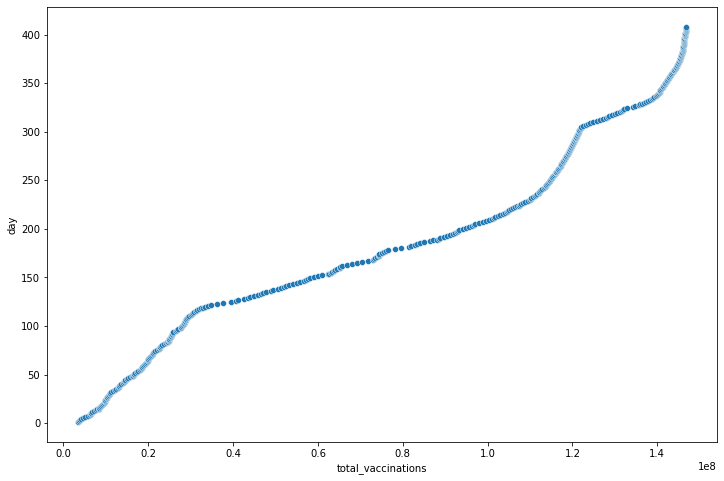

In [155]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="total_vaccinations", y="day", data=df)

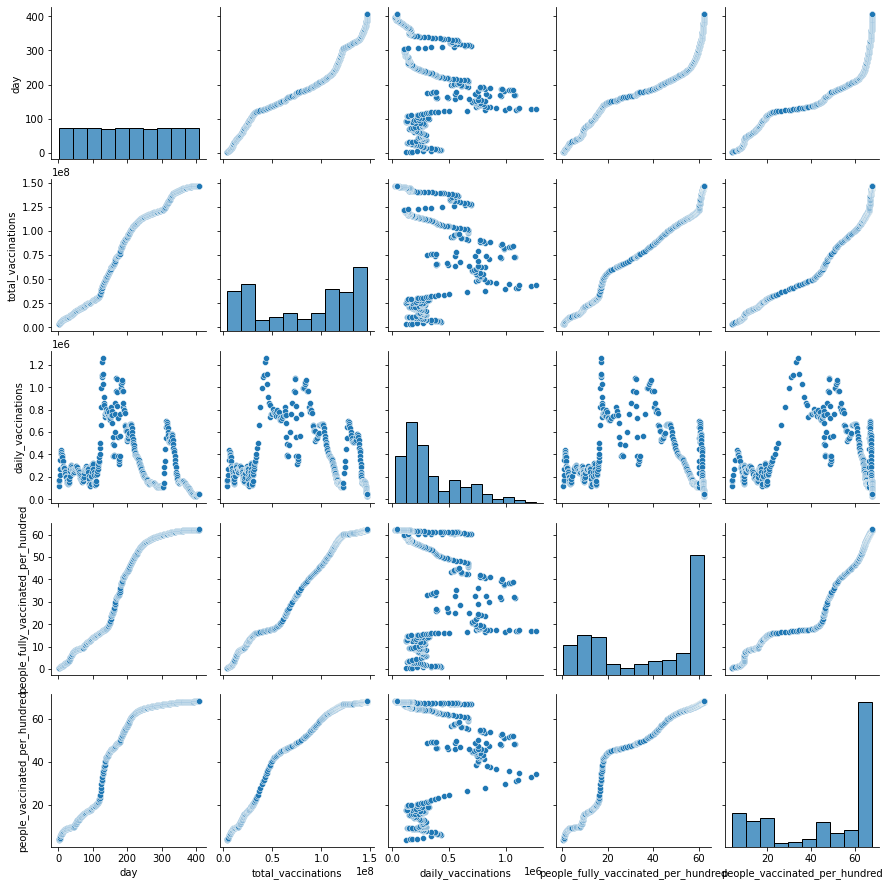

In [156]:
sns.pairplot(df)

In [157]:
df.corr()

,day,total_vaccinations,daily_vaccinations,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred
day,1.000000,0.982699,-0.229776,0.962902,0.934456
total_vaccinations,0.982699,1.000000,-0.175968,0.991465,0.974771
daily_vaccinations,-0.229776,-0.175968,1.000000,-0.196989,-0.031279
people_fully_vaccinated_per_hundred,0.962902,0.991465,-0.196989,1.000000,0.974439
people_vaccinated_per_hundred,0.934456,0.974771,-0.031279,0.974439,1.000000


<AxesSubplot:>

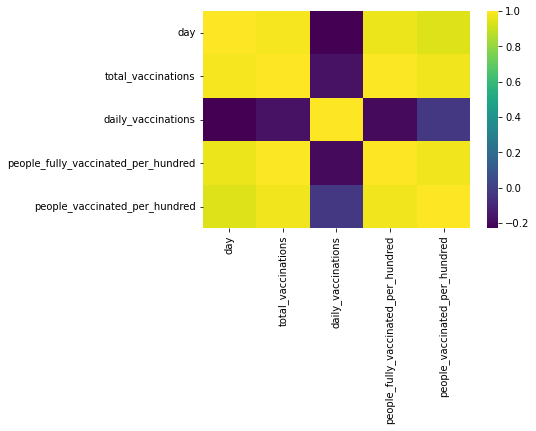

In [158]:
sns.heatmap(df.corr(), cmap="viridis")

---
## Train Test Split

In [159]:
X = df.drop(["total_vaccinations","country"], axis=1)
y = df["total_vaccinations"]

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.25, random_state=9)

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

---
## SVM Model

In [164]:
from sklearn.svm import SVR, LinearSVR

In [165]:
lin_model = SVR()
lin_model.fit(scaled_X_train, y_train)

SVR()

In [166]:
lin_pred = lin_model.predict(scaled_X_test)

---
## Değerlendirme

In [167]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [168]:
print("MAE :       ", round(mean_absolute_error(y_test,lin_pred)))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,lin_pred))))

MAE :        49814731
RMSE :       58007439


In [169]:
print("Mean    : ",round(y_test.mean()))
print("Std Dev : ",round(y_test.std()))

Mean    :  76218266
Std Dev :  51569971


---
## Grid Search

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
C = [0.001,0.01,0.1,1,10]
kernel = ['linear','rbf','poly']
gamma = ['scale','auto']
degree = [2,3,4]
epsilon = [0,0.01,0.1,0.5,1,2]

param_grid = {
    'C':C,
    'kernel':kernel,
    'gamma':gamma,
    'degree':degree,
    'epsilon':epsilon
}

In [172]:
svr = SVR()

In [173]:
grid = GridSearchCV(svr, param_grid=param_grid)
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [174]:
grid.best_params_

{'C': 10, 'degree': 2, 'epsilon': 0, 'gamma': 'scale', 'kernel': 'linear'}

In [176]:
svr_pred = grid.predict(scaled_X_test)

In [177]:
print("MAE : ", round(mean_absolute_error(y_test,svr_pred)))
print("RMSE :", round(np.sqrt(mean_squared_error(y_test,svr_pred))))

MAE :  49806655
RMSE : 57998758
